In [1]:
import pandas as pd

In [2]:
train_dataset = pd.read_csv("data/train.csv")

In [3]:
train_dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_dataset.loc[train_dataset['comment_text'].isnull()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [5]:
train_dataset.loc[train_dataset['id'].isnull()]


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [9]:
num_class = train_dataset[train_dataset.columns[2:]].sum()
num_class

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

## Biased distribution problem may arise.. ##

In [10]:
import matplotlib.pyplot as plt

In [11]:
mat_class = train_dataset[train_dataset.columns[2:]]
mat_class.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [18]:
train_dataset[mat_class.sum(axis=1) > 5]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1
7299,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1
13648,2405c66d017f139e,Bitch \n\nYou are a little bitch. I fuckin spe...,1,1,1,1,1,1
13964,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1
22158,3a704e2efa9fa300,FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF...,1,1,1,1,1,1
29968,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1
32098,554a87fb67e51344,Fuck All Asyriac Nation \n\nQamishli belong to...,1,1,1,1,1,1
33951,5a8eab9cfe601d3a,GO FUCK YOURSELF BITCH. I HATE YOUR SOULD. M...,1,1,1,1,1,1
38513,66c3bced1735cb90,AM GOING TO RAPE YOU IN THE ASS YOU FAT BITCH ...,1,1,1,1,1,1


In [21]:
train_dataset['char_len'] = train_dataset['comment_text'].str.len()

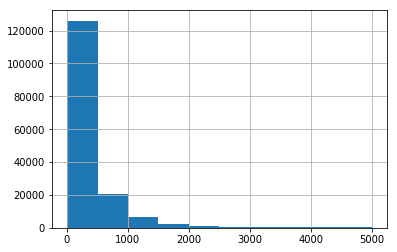

In [22]:
train_dataset['char_len'].hist()
plt.show()

In [26]:
train_dataset['capital_num'] = train_dataset['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))

In [27]:
train_dataset['alpha_num'] = train_dataset['comment_text'].apply(lambda comment: sum((1 for c in comment if c.isalpha())))

In [29]:
train_dataset['capital_ratio'] = train_dataset['capital_num'] / train_dataset['alpha_num']

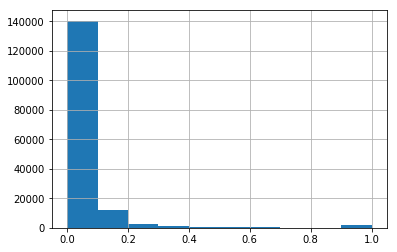

In [30]:
train_dataset['capital_ratio'].hist()
plt.show()

In [39]:
features = ['capital_ratio']
columns = [str(s) for s in train_dataset.columns[2:]]
rows = [ [ train_dataset[f].corr(train_dataset[c]) for c in columns] for f in features ]
df_corr = pd.DataFrame(rows, index=features, columns=columns)
df_corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate,char_len,capital_num,alpha_num,capital_ratio
capital_ratio,0.220565,0.168632,0.18268,0.056148,0.169202,0.089156,-0.065834,0.294161,-0.070257,1.0


In [37]:
columns

['toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate',
 'char_len',
 'capital_num',
 'alpha_num',
 'capital_ratio']